In [30]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import random
import haversine as hs

##visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#visualization of maps
import geopandas

import folium
from folium.plugins import HeatMap

from IPython.core.display import display, HTML

# Load dataset

### Data for this project were taken from kaggle:
https://www.kaggle.com/datasets/karthikbhandary2/city-bike-dataset/data

In [31]:
general_dataset = pd.read_csv('bike_data.csv')

# General info about dataset

In [32]:
general_dataset.head()

,Unnamed: 0,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender,age,log_trip,year
0,1,222,2020-09-01 00:15:58.6470,2020-09-01 00:19:40.8750,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,45656,Subscriber,1992,M,28,5.402677,Sep 2020
1,2,193,2020-09-01 00:49:00.7370,2020-09-01 00:52:14.3640,3640,Journal Square,40.733670,-74.062500,3206,Hilltop,40.731169,-74.057574,45352,Subscriber,1991,M,29,5.262690,Sep 2020
2,3,273,2020-09-01 00:51:44.5870,2020-09-01 00:56:17.7160,3191,Union St,40.718211,-74.083639,3694,Jackson Square,40.711130,-74.078900,44424,Subscriber,1969,M,51,5.609472,Sep 2020
3,4,1419,2020-09-01 00:52:48.3160,2020-09-01 01:16:28.0490,3203,Hamilton Park,40.727596,-74.044247,3270,Jersey & 6th St,40.725289,-74.045572,42240,Subscriber,1986,M,34,7.257708,Sep 2020
4,5,254,2020-09-01 00:56:16.7170,2020-09-01 01:00:31.0870,3194,McGinley Square,40.725340,-74.067622,3679,Bergen Ave,40.722104,-74.071455,42434,Subscriber,1992,M,28,5.537334,Sep 2020


In [33]:
general_dataset.shape

(103049, 19)

In [34]:
general_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103049 entries, 0 to 103048
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               103049 non-null  int64  
 1   tripduration             103049 non-null  int64  
 2   starttime                103049 non-null  object 
 3   stoptime                 103049 non-null  object 
 4   start.station.id         103049 non-null  int64  
 5   start.station.name       103049 non-null  object 
 6   start.station.latitude   103049 non-null  float64
 7   start.station.longitude  103049 non-null  float64
 8   end.station.id           103049 non-null  int64  
 9   end.station.name         103049 non-null  object 
 10  end.station.latitude     103049 non-null  float64
 11  end.station.longitude    103049 non-null  float64
 12  bikeid                   103049 non-null  int64  
 13  usertype                 103049 non-null  object 
 14  birt

In [35]:
general_dataset.describe()

,Unnamed: 0,tripduration,start.station.id,start.station.latitude,start.station.longitude,end.station.id,end.station.latitude,end.station.longitude,bikeid,birth.year,age,log_trip
count,103049.000000,1.030490e+05,103049.000000,103049.000000,103049.000000,103049.000000,103049.000000,103049.000000,103049.000000,103049.000000,103049.000000,103049.000000
mean,51525.000000,1.210641e+03,3306.398995,40.722369,-74.046245,3306.168260,40.722070,-74.045774,35526.059418,1981.832158,37.690244,6.319960
std,29747.828282,1.972644e+04,186.093512,0.007171,0.011461,195.358018,0.007050,0.011327,7969.944942,10.637771,10.641295,0.940207
min,1.000000,6.100000e+01,3184.000000,40.711130,-74.083639,116.000000,40.701403,-74.083639,14585.000000,1930.000000,16.000000,4.110874
25%,25763.000000,2.840000e+02,3195.000000,40.716870,-74.050656,3195.000000,40.716870,-74.050389,29269.000000,1972.000000,29.000000,5.648974
50%,51525.000000,4.880000e+02,3210.000000,40.721124,-74.043845,3209.000000,40.721124,-74.043117,29680.000000,1984.000000,35.000000,6.190315
75%,77287.000000,9.730000e+02,3276.000000,40.727224,-74.037683,3276.000000,40.727224,-74.037683,42586.000000,1990.000000,47.000000,6.880384
max,103049.000000,3.261756e+06,3792.000000,40.748716,-74.032108,4069.000000,40.848282,-73.941343,47939.000000,2004.000000,90.000000,14.997776


# Data preparation 

rename columns where word separator `.` on `_`

In [36]:
general_dataset.rename(columns={'start.station.id': 'start_station_id',
                                'start.station.name': 'start_station_name',
                                'start.station.latitude': 'start_station_latitude',
                                'start.station.longitude': 'start_station_longitude',
                                'end.station.id': 'end_station_id',
                                'end.station.name': 'end_station_name',
                                'end.station.latitude': 'end_station_latitude',
                                'end.station.longitude': 'end_station_longitude'}, inplace = True)

The missing value are only in column `gender`, so fill them with random value of "M" or "F" 

In [37]:
general_dataset["gender"] = general_dataset["gender"].fillna(random.choice(["M", "F"]))

In [38]:
#replace value gender 'F' and 'M' on 'male' and 'female'
general_dataset['gender'].replace(['F', 'M'], ['female', 'male'], inplace=True)

Drop columns

In [39]:
general_dataset = general_dataset.drop(['Unnamed: 0', 'birth.year', 'year'], axis = 1)

convert columns `starttime` and `stoptime` in datetime type

In [40]:
general_dataset['starttime'] = pd.to_datetime(general_dataset['starttime'])
general_dataset['stoptime'] = pd.to_datetime(general_dataset['stoptime'])

add columns `trip_type_by_duration` and `age_group`<br>

`trip_type_by_duration`:
- "short trip" - duration is less than an hour
- "average trip" - duration is less than a day
- "long trip" - duration is less than a month
- "extra long trip" - duration is more than a month

In [41]:
general_dataset['trip_type_by_duration'] = np.where(general_dataset['tripduration'] < 3600, "short trip", np.where(
    (general_dataset['tripduration'] > 3600) & (general_dataset['tripduration'] < 3600 * 24), "average trip", np.where(
    (general_dataset['tripduration'] > 3600 * 24) & (general_dataset['tripduration'] < 3600 * 24 * 30), "long trip",
        "extra long trip")))

In [42]:
general_dataset['age_group'] = np.where(general_dataset['age'] < 18, '[0, 18]', np.where(
    (general_dataset['age'] >= 18) & (general_dataset['age'] < 30), '[18, 30]', np.where(
    (general_dataset['age'] >= 30) & (general_dataset['age'] < 50), '[30, 50]', np.where(
    (general_dataset['age'] >= 50) & (general_dataset['age'] < 70), '[50, 70]', '[70+]'))))

add columns with start and end location

In [43]:
general_dataset['start_station_location'] = general_dataset[['start_station_latitude',
                                                             'start_station_longitude']].values.tolist()
general_dataset['end_station_location'] = general_dataset[['end_station_latitude', 
                                                           'end_station_longitude']].values.tolist()

In [44]:
general_dataset = general_dataset.drop(['start_station_latitude', 
                                        'start_station_longitude', 
                                        'end_station_latitude',
                                        'end_station_longitude'], axis = 1)

In [45]:
general_dataset.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,end_station_id,end_station_name,bikeid,usertype,gender,age,log_trip,trip_type_by_duration,age_group,start_station_location,end_station_location
0,222,2020-09-01 00:15:58.647,2020-09-01 00:19:40.875,3186,Grove St PATH,3276,Marin Light Rail,45656,Subscriber,male,28,5.402677,short trip,"[18, 30]","[40.7195861164717, -74.0431174635887]","[40.7145840353589, -74.042817056179]"
1,193,2020-09-01 00:49:00.737,2020-09-01 00:52:14.364,3640,Journal Square,3206,Hilltop,45352,Subscriber,male,29,5.262690,short trip,"[18, 30]","[40.73367, -74.0625]","[40.7311689, -74.0575736]"
2,273,2020-09-01 00:51:44.587,2020-09-01 00:56:17.716,3191,Union St,3694,Jackson Square,44424,Subscriber,male,51,5.609472,short trip,"[50, 70]","[40.7182113, -74.0836394]","[40.71113, -74.0789]"
3,1419,2020-09-01 00:52:48.316,2020-09-01 01:16:28.049,3203,Hamilton Park,3270,Jersey & 6th St,42240,Subscriber,male,34,7.257708,short trip,"[30, 50]","[40.727595966, -74.044247311]","[40.7252891078113, -74.0455716848373]"
4,254,2020-09-01 00:56:16.717,2020-09-01 01:00:31.087,3194,McGinley Square,3679,Bergen Ave,42434,Subscriber,male,28,5.537334,short trip,"[18, 30]","[40.7253399253558, -74.0676221251488]","[40.722103786686, -74.0714550018311]"


# Where do Citi Bikers ride?

In [46]:
#dataset with start station name, start station location and count of starts
start_trip_info = general_dataset.groupby('start_station_name').agg({'start_station_name':'count'}).rename(
    columns={'start_station_name' : 'count_of_starts'}).reset_index().sort_values(by = 'start_station_name')

start_trip_info['start_station_location'] = general_dataset[['start_station_name', 'start_station_location']].drop_duplicates(
    subset='start_station_name').sort_values(by='start_station_name').reset_index(drop=True)['start_station_location']

#dataset with end station name, end station location and count of ends
end_trip_info = general_dataset.groupby('end_station_name').agg({'end_station_name':'count'}).rename(
    columns={'end_station_name' : 'count_of_ends'}).reset_index().sort_values(by = 'end_station_name')

end_trip_info['end_station_location'] = general_dataset[['end_station_name', 'end_station_location']].drop_duplicates(
    subset='end_station_name').sort_values(by='end_station_name').reset_index(drop=True)['end_station_location']

#dataset with station name, station location and sum of starts and ends
count_of_trips_by_stations = end_trip_info.merge(
    start_trip_info.rename(columns={'start_station_name': 'end_station_name'}), how='outer',
    on='end_station_name').rename(columns={'end_station_name': 'station_name'})

count_of_trips_by_stations['sum_of_starts_and_ends'] = (count_of_trips_by_stations['count_of_starts'].fillna(0) \
                                        + count_of_trips_by_stations['count_of_ends']).astype('int')

count_of_trips_by_stations = count_of_trips_by_stations.drop(
    ['count_of_starts', 'count_of_ends', 'end_station_location', 'start_station_location'], axis =1)
count_of_trips_by_stations = count_of_trips_by_stations.sort_values(by = 'sum_of_starts_and_ends', ascending=False).reset_index(
    drop=True)

### Maps points of start stations and points of end stations

In [47]:
# map stations which start the trips
map_points_of_start = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
for point in start_trip_info.index:
    iframe = folium.IFrame(f'Station:"{start_trip_info["start_station_name"][point]}" <br>' 
                           f'Count of started trips:{start_trip_info["count_of_starts"][point]}')
    popup = folium.Popup(iframe, min_width=250, max_width=250)
    folium.Marker(start_trip_info['start_station_location'][point], popup=popup,
              icon=folium.Icon(color='darkblue', icon='bicycle', prefix='fa')).add_to(map_points_of_start)
    
# map stations which end the trips
map_points_of_end = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
for point in end_trip_info.index:
    iframe = folium.IFrame(f'Station:"{end_trip_info["end_station_name"][point]}" <br>' 
                           f'Count of ended trips:{end_trip_info["count_of_ends"][point]}')
    popup = folium.Popup(iframe, min_width=250, max_width=250)
    folium.Marker(end_trip_info['end_station_location'][point], popup=popup,
                icon=folium.Icon(color='green', icon='home')).add_to(map_points_of_end)
    
# create subplots
htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           .format(map_points_of_start.get_root().render().replace('"', '&quot;'),500,500,
                   map_points_of_end.get_root().render().replace('"', '&quot;'),500,500))
display(htmlmap)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Which stations are most popular?

[Text(0, 0.5, ''), Text(0.5, 0, 'sum of starts and ends by stations')]

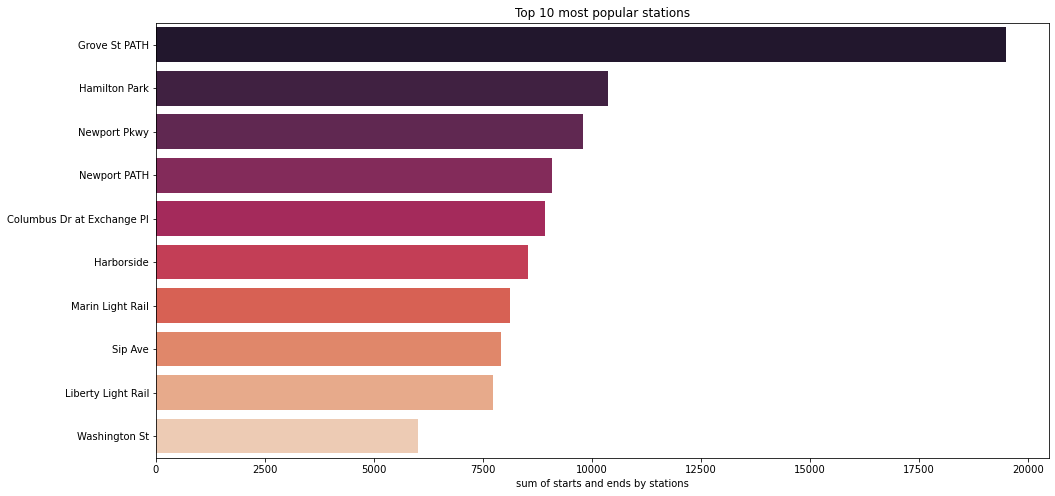

In [48]:
#top stations
plt.figure(figsize=(16,8))
plt.title('Top 10 most popular stations')
ax = sns.barplot(x='sum_of_starts_and_ends', 
                 y='station_name', 
                 data=count_of_trips_by_stations[:10], 
                 palette="rocket")
ax.set(ylabel=None, xlabel="sum of starts and ends by stations")

## Heatmap of stations

In [49]:
heatmap_start_trip = folium.Map(location=[40.7128,-73.9352], default_zoom_start=12)
heatmap = HeatMap(end_trip_info['end_station_location'], max_zoom=1).add_to(heatmap_start_trip)
heatmap_start_trip

## Top routes

In [50]:
route = pd.DataFrame({'route' : general_dataset['start_station_name'] + ' - '
                                     + general_dataset['end_station_name'],
                     'location' : general_dataset['start_station_location'] 
                                     + general_dataset['end_station_location']})
route['location'] = route['location'].apply(lambda x: tuple(x))
routes_info = route.groupby('route').count().reset_index().rename(columns = {'location': 'number_of_trips'})
route_locations = route.sort_values(by='route').drop_duplicates().reset_index(drop = True)
routes_info['location'] = route_locations['location'].apply(lambda x: list(x))
routes_info = routes_info.sort_values(by = 'number_of_trips', ascending=False).reset_index(drop=True)
routes_info.head()

,route,number_of_trips,location
0,Liberty Light Rail - Liberty Light Rail,1337,"[40.7112423, -74.0557013, 40.7112423, -74.0557..."
1,Hamilton Park - Grove St PATH,1243,"[40.727595966, -74.044247311, 40.7195861164717..."
2,Newport Pkwy - Newport Pkwy,1042,"[40.7287448, -74.0321082, 40.7287448, -74.0321..."
3,Grove St PATH - Hamilton Park,936,"[40.7195861164717, -74.0431174635887, 40.72759..."
4,McGinley Square - Sip Ave,837,"[40.7253399253558, -74.0676221251488, 40.73089..."


Text(0, 0.5, 'route')

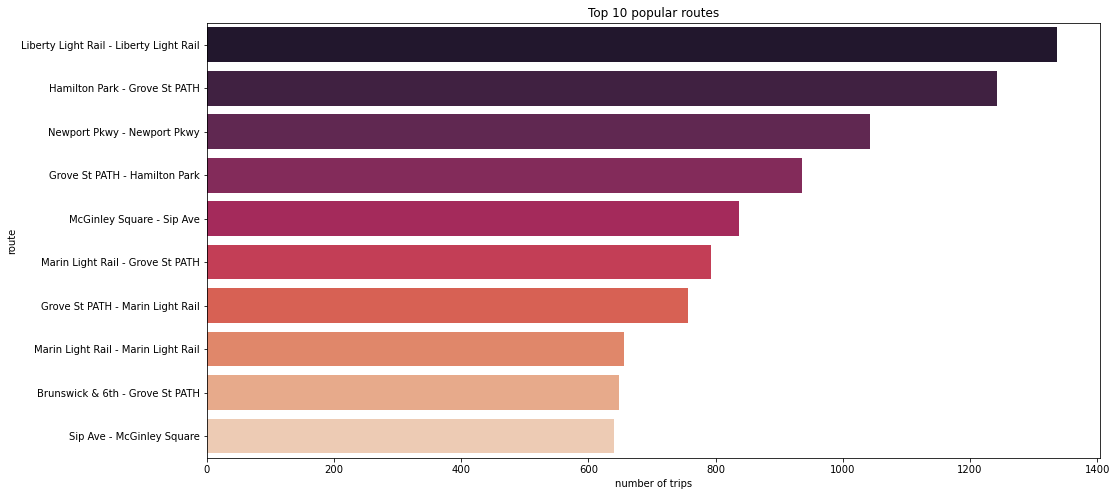

In [51]:
plt.figure(figsize=(16,8))
plt.title('Top 10 popular routes')
sns.barplot(y = routes_info['route'][:10], x = routes_info['number_of_trips'][:10],  palette="rocket")
plt.xlabel('number of trips')
plt.ylabel('route')

### Visualization of the 3 most popular routes on the map

In [52]:
map_top_popular_routes = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
for point in routes_info.index:
    if point  < 3:
        iframe_s = folium.IFrame(f'Start of route "{routes_info["route"][point]}"')
        popup_s = folium.Popup(iframe_s, min_width=300, max_width=300)
        folium.Marker(routes_info['location'][point][:2], popup=popup_s, icon=folium.Icon(
            color='blue',  icon='bicycle', prefix='fa')).add_to(map_top_popular_routes)
        
        iframe_e = folium.IFrame(f'End of route "{routes_info["route"][point]}"')
        popup_e = folium.Popup(iframe_e, min_width=300, max_width=300)
        folium.Marker(routes_info['location'][point][2:], popup=popup_e, icon=folium.Icon(color='green', icon='home')) \
            .add_to(map_top_popular_routes)
        folium.PolyLine([(routes_info['location'][point][:2], routes_info['location'][point][2:])], 
                        color='red').add_to(map_top_popular_routes)
    else:
        break
map_top_popular_routes

The map shows that the most popular route starts at the "Liberty Light Rail" station and ends at the "Liberty Light Rail" station. This is explained by the fact that there is a park nearby and people take a bicycle, ride around the park and return it

 # When do they ride?

Text(0.5, 0, 'starttime by dayofweek')

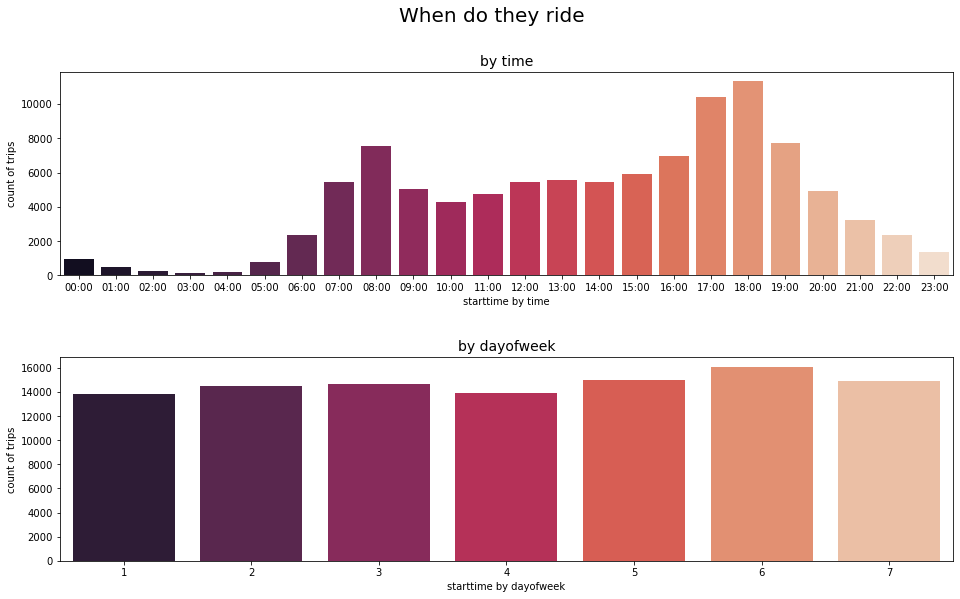

In [53]:
general_dataset['starttime_by_hours'] = general_dataset['starttime'].dt.strftime('%H:00')
general_dataset['starttime_by_dayofweek'] = general_dataset['starttime'].dt.dayofweek+1


count_of_trips_groupby_hours = general_dataset.groupby('starttime_by_hours').agg({'starttime_by_hours':'count'}).rename(
    columns = {'starttime_by_hours':'count_of_trips'}).reset_index()
count_of_trips_groupby_dayofweeks = general_dataset.groupby('starttime_by_dayofweek').agg(
    {'starttime_by_dayofweek':'count'}).rename(columns = {'starttime_by_dayofweek':'count_of_trips'}).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(16,9))
plt.subplots_adjust(hspace=0.4)
fig.suptitle('When do they ride', size = 20)

sns.barplot(ax=axes[0], x='starttime_by_hours', y='count_of_trips', data=count_of_trips_groupby_hours,  palette="rocket")
axes[0].set_title("by time", size = 14)
axes[0].set_ylabel('count of trips')
axes[0].set_xlabel('starttime by time')

sns.barplot(ax=axes[1], x='starttime_by_dayofweek', y='count_of_trips', data=count_of_trips_groupby_dayofweeks,
            palette="rocket").set(title='by dayofweek')
axes[1].set_title("by dayofweek", size = 14)
axes[1].set_ylabel('count of trips')
axes[1].set_xlabel('starttime by dayofweek')

# How far do they go? 

In [54]:
# the function of measurement the distance of the route in kilometers
def distance_measurement(start_location: pd.Series, end_location: pd.Series) -> pd.Series:
    list_of_distances = []
    for loc1, loc2 in zip(start_location.apply(lambda x: tuple(x)), end_location.apply(lambda x: tuple(x))):
        list_of_distances.append(hs.haversine(loc1, loc2))
    return pd.Series(list_of_distances)

general_dataset['route_distance'] = distance_measurement(general_dataset['start_station_location'], 
                                                         general_dataset['end_station_location'])

In [55]:
general_dataset.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,end_station_id,end_station_name,bikeid,usertype,gender,age,log_trip,trip_type_by_duration,age_group,start_station_location,end_station_location,starttime_by_hours,starttime_by_dayofweek,route_distance
0,222,2020-09-01 00:15:58.647,2020-09-01 00:19:40.875,3186,Grove St PATH,3276,Marin Light Rail,45656,Subscriber,male,28,5.402677,short trip,"[18, 30]","[40.7195861164717, -74.0431174635887]","[40.7145840353589, -74.042817056179]",00:00,2,0.556783
1,193,2020-09-01 00:49:00.737,2020-09-01 00:52:14.364,3640,Journal Square,3206,Hilltop,45352,Subscriber,male,29,5.262690,short trip,"[18, 30]","[40.73367, -74.0625]","[40.7311689, -74.0575736]",00:00,2,0.499651
2,273,2020-09-01 00:51:44.587,2020-09-01 00:56:17.716,3191,Union St,3694,Jackson Square,44424,Subscriber,male,51,5.609472,short trip,"[50, 70]","[40.7182113, -74.0836394]","[40.71113, -74.0789]",00:00,2,0.882930
3,1419,2020-09-01 00:52:48.316,2020-09-01 01:16:28.049,3203,Hamilton Park,3270,Jersey & 6th St,42240,Subscriber,male,34,7.257708,short trip,"[30, 50]","[40.727595966, -74.044247311]","[40.7252891078113, -74.0455716848373]",00:00,2,0.279737
4,254,2020-09-01 00:56:16.717,2020-09-01 01:00:31.087,3194,McGinley Square,3679,Bergen Ave,42434,Subscriber,male,28,5.537334,short trip,"[18, 30]","[40.7253399253558, -74.0676221251488]","[40.722103786686, -74.0714550018311]",00:00,2,0.483545


### A map showing the longest route

In [56]:
max_distance_id = general_dataset['route_distance'].idxmax()

print(f'The longest route between the station where the trip started and where it ended is:')
print(f'"{general_dataset.start_station_name[max_distance_id]} - {general_dataset.end_station_name[max_distance_id]}", '
      f'distance - {general_dataset["route_distance"][max_distance_id]}km.\n')

longest_route_map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
iframe_s = folium.IFrame(f'Start route "{general_dataset["start_station_name"][max_distance_id]}"')
popup_s = folium.Popup(iframe_s, min_width=200, max_width=200)
folium.Marker(general_dataset['start_station_location'][max_distance_id], popup=popup_s, icon=folium.Icon(
    color='blue',  icon='bicycle', prefix='fa')).add_to(longest_route_map)
        
iframe_e = folium.IFrame(f'End route "{general_dataset["end_station_name"][max_distance_id]}"')
popup_e = folium.Popup(iframe_e, min_width=300, max_width=300)
folium.Marker(general_dataset['end_station_location'][max_distance_id], popup=popup_e, icon=folium.Icon(
    color='green', icon='home')).add_to(longest_route_map)

folium.PolyLine([(general_dataset['start_station_location'][max_distance_id], 
    general_dataset['end_station_location'][max_distance_id])], color='red').add_to(longest_route_map)
longest_route_map

The longest route between the station where the trip started and where it ended is:
"Columbus Dr at Exchange Pl - Cabrini Blvd & W 177 St", distance - 16.51754548231762km.



# Who ride them?

Text(0, 0.5, 'count of riders')

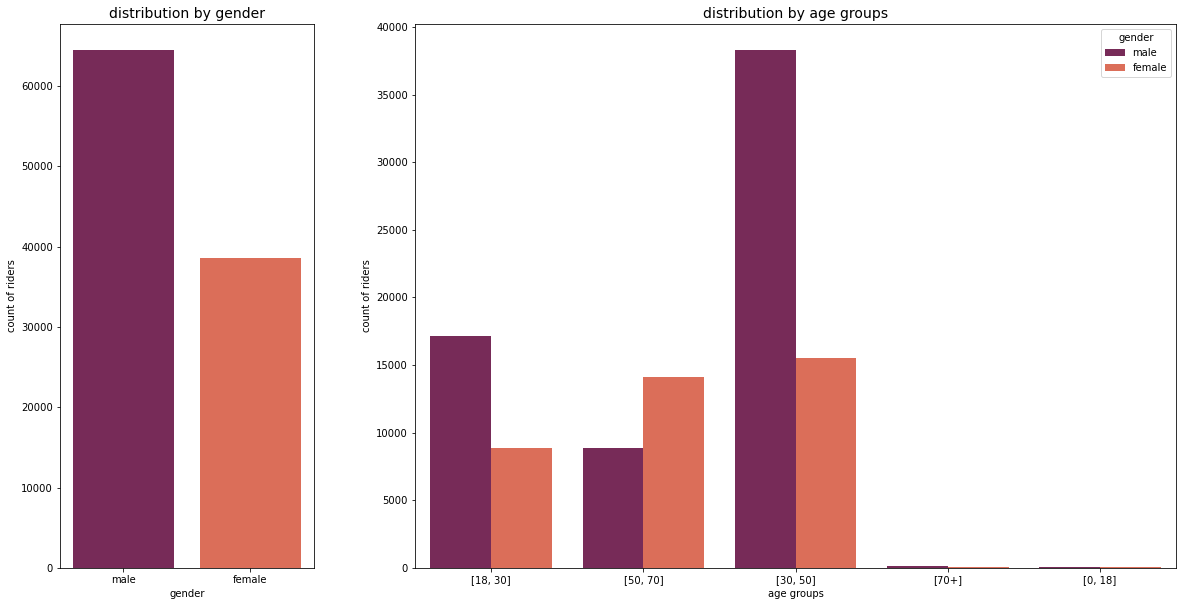

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10),  gridspec_kw={'width_ratios': [1, 3]})

sns.countplot(ax = axes[0], x='gender', data=general_dataset, palette="rocket")
axes[0].set_title("distribution by gender", size = 14)
axes[0].set_xlabel('gender')
axes[0].set_ylabel('count of riders')

sns.countplot(ax = axes[1], x='age_group', hue = 'gender',  data=general_dataset, palette="rocket")
axes[1].set_title("distribution by age groups", size = 14)
axes[1].set_xlabel('age groups')
axes[1].set_ylabel('count of riders')

Text(0, 0.5, 'count of riders')

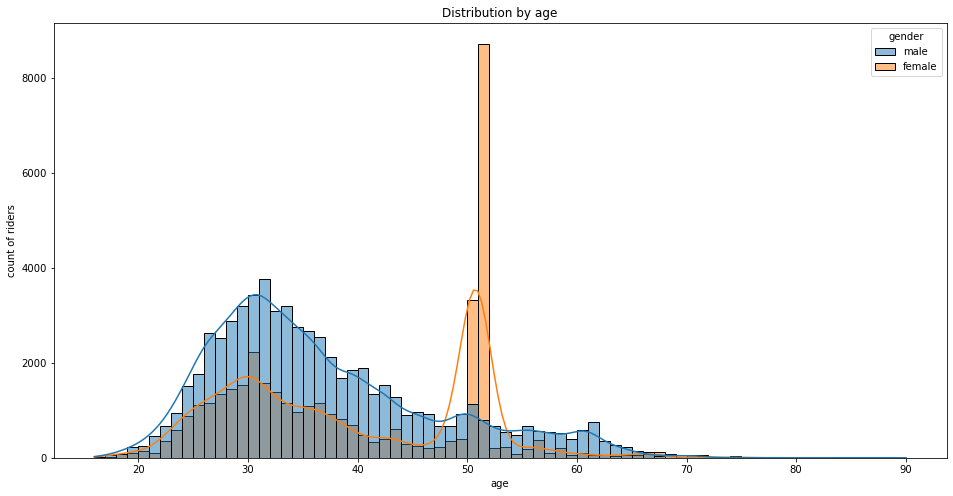

In [58]:
plt.figure(figsize=(16,8))
plt.title('Distribution by age')
sns.histplot(data=general_dataset, x="age", hue = 'gender', binwidth=1, kde = True)
plt.ylabel('count of riders')